<a href="https://colab.research.google.com/github/maddepallisivani123/SVM-Team-Project1/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from sklearn import datasets

iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

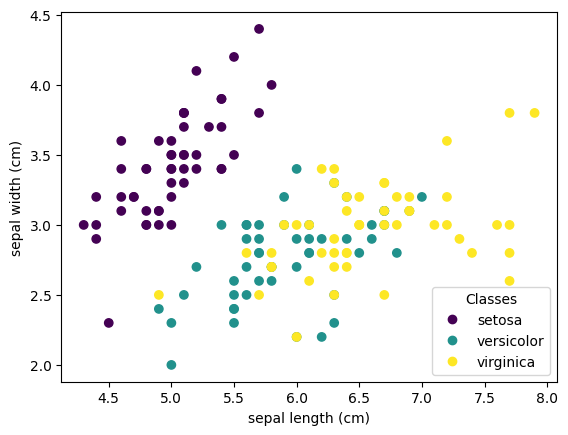

In [8]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

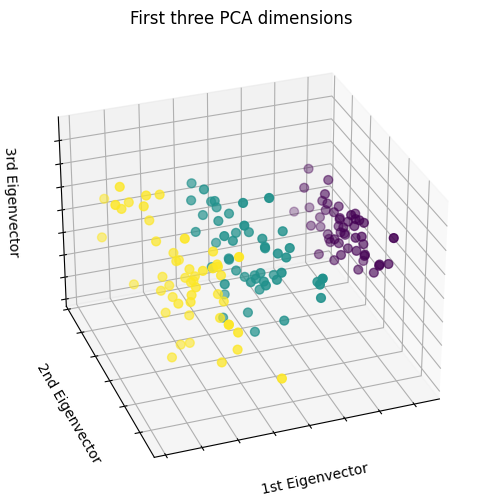

In [9]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

In [15]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

import numpy as np

# Load the Iris dataset
iris = datasets.load_iris()

# Step 1: Data Exploration and Preparation
# Check for missing values (not needed for the Iris dataset)
# Scaling Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)

# Split the scaled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, iris.target, test_size=0.2, random_state=42)

# Step 2: SVM Implementation
# Create SVM classifier with different kernels and parameters
svm_kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_params = [
    {'kernel': 'linear', 'C': 1},
    {'kernel': 'poly', 'C': 1, 'degree': 3},
    {'kernel': 'rbf', 'C': 1, 'gamma': 'auto'},
    {'kernel': 'sigmoid', 'C': 1}
]

# Define the cross-validation iterator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_score = 0
best_params = None

for kernel, params in zip(svm_kernels, svm_params):
    svm_model = SVC(**params)

    # Initialize list to store accuracy scores for each fold
    accuracy_scores = []

    # Use cross-validation with the defined iterator (kf)
    for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_train)):
        X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
        y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]

        svm_model.fit(X_fold_train, y_fold_train)
        y_pred_val = svm_model.predict(X_fold_val)

        fold_accuracy = accuracy_score(y_fold_val, y_pred_val)
        accuracy_scores.append(fold_accuracy)

        print(f"Kernel: {kernel}, Fold: {fold_idx + 1}, Accuracy: {fold_accuracy:.4f}")

    # Compute mean accuracy across folds
    mean_accuracy = np.mean(accuracy_scores)

    print(f"\nKernel: {kernel}")
    print("Mean CV accuracy:", mean_accuracy)

    if mean_accuracy > best_score:
        best_score = mean_accuracy
        best_params = params

# Train the SVM model with the best parameters
svm_model = SVC(**best_params)
svm_model.fit(X_train, y_train)

print("\nBest SVM Parameters:", best_params)

# Predict the labels for the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Additional Evaluation Metrics
print("\nAdditional Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))


Kernel: linear, Fold: 1, Accuracy: 0.9167
Kernel: linear, Fold: 2, Accuracy: 1.0000
Kernel: linear, Fold: 3, Accuracy: 0.9583
Kernel: linear, Fold: 4, Accuracy: 0.8750
Kernel: linear, Fold: 5, Accuracy: 1.0000

Kernel: linear
Mean CV accuracy: 0.95
Kernel: poly, Fold: 1, Accuracy: 1.0000
Kernel: poly, Fold: 2, Accuracy: 0.9583
Kernel: poly, Fold: 3, Accuracy: 0.8750
Kernel: poly, Fold: 4, Accuracy: 0.8333
Kernel: poly, Fold: 5, Accuracy: 1.0000

Kernel: poly
Mean CV accuracy: 0.9333333333333333
Kernel: rbf, Fold: 1, Accuracy: 0.9167
Kernel: rbf, Fold: 2, Accuracy: 1.0000
Kernel: rbf, Fold: 3, Accuracy: 0.9167
Kernel: rbf, Fold: 4, Accuracy: 0.9167
Kernel: rbf, Fold: 5, Accuracy: 1.0000

Kernel: rbf
Mean CV accuracy: 0.95
Kernel: sigmoid, Fold: 1, Accuracy: 0.8750
Kernel: sigmoid, Fold: 2, Accuracy: 1.0000
Kernel: sigmoid, Fold: 3, Accuracy: 1.0000
Kernel: sigmoid, Fold: 4, Accuracy: 0.7500
Kernel: sigmoid, Fold: 5, Accuracy: 0.9583

Kernel: sigmoid
Mean CV accuracy: 0.9166666666666666


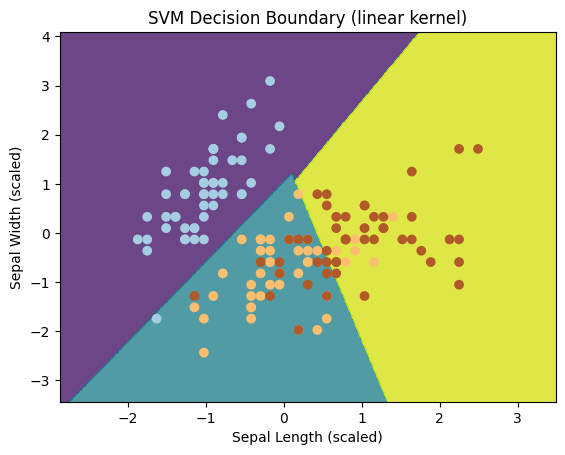

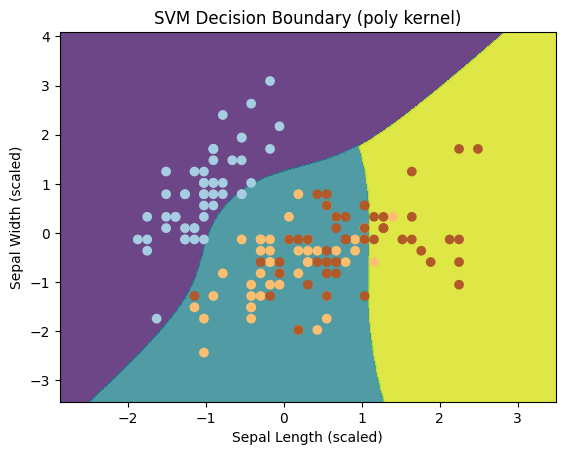

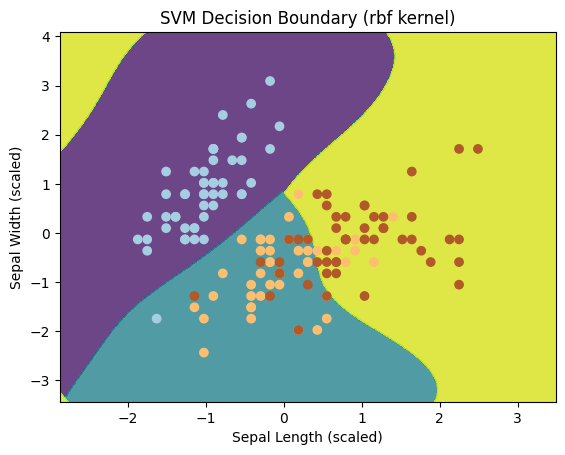

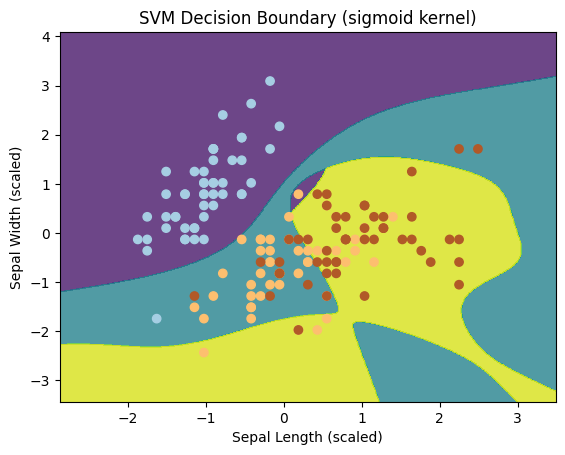

In [16]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Create a meshgrid of feature values
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Plot the decision boundaries for each kernel
for kernel, params in zip(svm_kernels, svm_params):
    svm_model = SVC(**params)
    svm_model.fit(X_scaled[:, :2], iris.target)

    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=iris.target, cmap=plt.cm.Paired)
    plt.xlabel('Sepal Length (scaled)')
    plt.ylabel('Sepal Width (scaled)')
    plt.title(f'SVM Decision Boundary ({kernel} kernel)')
    plt.show()
